## Dynamical System Modeling Using Neural ODE
*July 9th, 2024*

[Reference Page ](https://www.mathworks.com/help/deeplearning/ug/dynamical-system-modeling-using-neural-ode.html) (Mathworks)

In [13]:
import math
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Get Device for Training
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [3]:
# Neural Network Architecture
class NeuralODE(nn.Module):
    def __init__(self, hidden_size, output_size=1, input_size=1) -> None:
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        out = self.net(x)
        return out

In [4]:
# Instance of neural network and Display network structure
model = NeuralODE(hidden_size=10).to(device)
model

NeuralODE(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Tanh()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [62]:
# ODE System
true_model = lambda t, y: A @ y 

# Initial Conditions
x0 = [2, 0]
A = np.array([[-0.1, -1],[1, -0.1]])

T = 15
num_timesteps = 2000
t_span = (0, 15)
t_eval = np.linspace(0, T, num_timesteps)

solution = solve_ivp(true_model, t_span, x0, method='RK45', t_eval=t_eval)

x = solution.t
y = solution.y[0]

xTrain = solution.y[1]
xTrain = xTrain.T

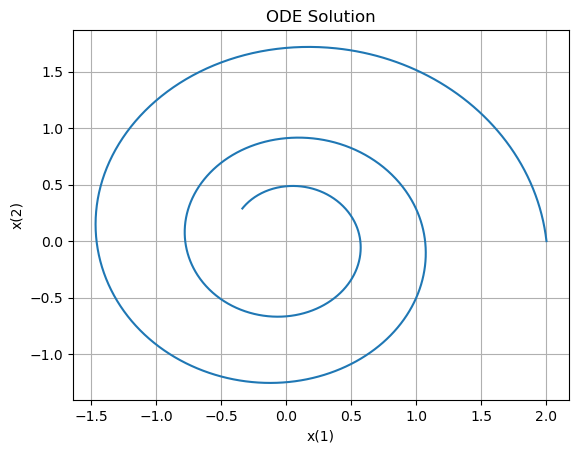

In [65]:
plt.plot(y, xTrain)
plt.xlabel('x(1)')
plt.ylabel('x(2)')
plt.title('ODE Solution')
plt.grid()
plt.show()